# Principle Component Analysis (PCA) for Data Visualization


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Load Iris Dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [5]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

In [8]:
# Separating out the features
x = df.loc[:, features].values


In [9]:
# Separating out the target
y = df.loc[:,['target']].values

In [10]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2)

In [13]:
principalComponents = pca.fit_transform(x)

In [14]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca 1', 'pca 2',])

In [15]:
principalDf

,pca 1,pca 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [16]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [17]:
finalDf

,pca 1,pca 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


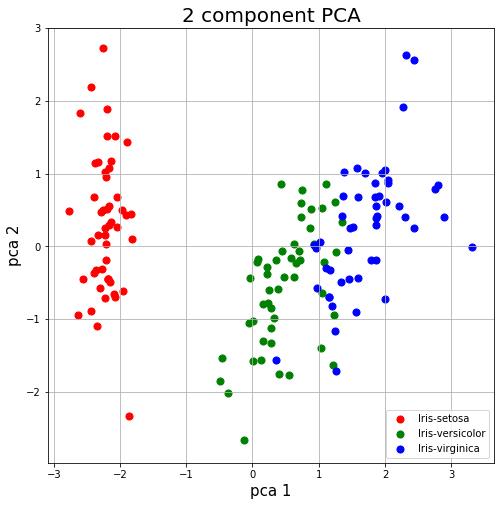

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pca 1', fontsize = 15)
ax.set_ylabel('pca 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pca 1'], finalDf.loc[indicesToKeep, 'pca 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

In [19]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

# PCA to Speed-up Machine Learning Algorithms

# Download and Load the Data

In [30]:
from sklearn.datasets import fetch_openml

In [31]:
mnist = fetch_openml('mnist_784')

# Split Data into Training and Test Sets

Typically the train test split is 80% training and 20% test. In this case, I chose 6/7th of the data to be training and 1/7th of the data to be in the test set.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [53]:
scaler2 = StandardScaler()

In [35]:
# Fit on training set only.
scaler2.fit(train_img)
# Apply transform to both the training set and the test set.
train_img = scaler2.transform(train_img)
test_img = scaler2.transform(test_img)

In [36]:
# Make an instance of the Model
pca = PCA(.95)

In [37]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [38]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

# Apply Logistic Regression to the Transformed Data

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [41]:
logisticRegr.fit(train_img, train_lbl)

/home/yassine/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Predict the labels of new data (new images)

In [42]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

In [44]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

In [54]:
logisticRegr.score(test_img, test_lbl)

0.9201